<a href="https://colab.research.google.com/github/JFrankVC/tog/blob/main/TimeSeries_RNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount the Google Drive
# Allow access - check steps and methods in: https://neptune.ai/blog/google-colab-dealing-with-files
from google.colab import drive
drive.mount('/content/drive', force_remount=True)  # if Colab root directory is shown, go to /content folder

Mounted at /content/drive


In [ ]:
# How to install permanently non-preinstalled libraries
!pip install earthpy && touch /root/.ipython/profile_default/startup/00-first.py && echo "import earthpy" >> /root/.ipython/profile_default/startup/00-first.py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 74.0 MB/s eta 0:00:00


In [ ]:
!pip install pyhdf && touch /root/.ipython/profile_default/startup/00-first.py && echo "import pyhdf" >> /root/.ipython/profile_default/startup/00-first.py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.4/771.4 kB 9.4 MB/s eta 0:00:00


In [ ]:
# Import packages
import os
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
import numpy.ma as ma
import xarray as xr
from shapely.geometry import mapping, box
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import pandas as pd

# Import package pyhdf for reading HDF files (method used in local code)
from pyhdf.SD import SD, SDC
import numpy as np

from osgeo import gdal
xr.set_options(display_style='html')

In [ ]:
# Check current working directory corresponds to Google Drive
retval = os.getcwd()
print(f"Current working directory {retval}")

# Change the directory - Google Drive
path = "/content/drive/MyDrive/Colab_Notebooks/Datasets/MODIS_Proyecto_PAD/GIOVANNI/Time_Series/Monthly/"
os.chdir(path)

# Check current working directory corresponds to Google Drive
retval = os.getcwd()
print(f"Current working directory {retval}")

Current working directory /content/drive/MyDrive/Colab_Notebooks/Datasets/MODIS_Proyecto_PAD/GIOVANNI/Time_Series/Monthly
Current working directory /content/drive/MyDrive/Colab_Notebooks/Datasets/MODIS_Proyecto_PAD/GIOVANNI/Time_Series/Monthly


In [ ]:
# Set path to Dataset folder
folder_path = "/content/drive/MyDrive/Colab_Notebooks/Datasets/MODIS_Proyecto_PAD/GIOVANNI/Time_Series/Monthly/"

In [ ]:
# List all year folders in current folder
!ls

g4.areaAvgTimeSeries.AIRS3STM_7_0_SurfAirTemp_A.20120101-20221231.180W_90S_180E_90N.csv
g4.areaAvgTimeSeries.M2TMNXAER_5_12_4_TOTSMASS25.20120101-20221231.180W_90S_180E_90N.csv
g4.areaAvgTimeSeries.MOD08_M3_6_1_Aerosol_Optical_Depth_Land_Ocean_Mean_Mean.20120101-20221231.180W_90S_180E_90N.csv
g4.areaAvgTimeSeries.MOD08_M3_6_1_Deep_Blue_Angstrom_Exponent_Land_Mean_Mean.20120101-20221231.180W_90S_180E_90N.csv


In [ ]:
series = [f for f in os.listdir()]

In [ ]:
series

['g4.areaAvgTimeSeries.MOD08_M3_6_1_Deep_Blue_Angstrom_Exponent_Land_Mean_Mean.20120101-20221231.180W_90S_180E_90N.csv',
 'g4.areaAvgTimeSeries.AIRS3STM_7_0_SurfAirTemp_A.20120101-20221231.180W_90S_180E_90N.csv',
 'g4.areaAvgTimeSeries.MOD08_M3_6_1_Aerosol_Optical_Depth_Land_Ocean_Mean_Mean.20120101-20221231.180W_90S_180E_90N.csv',
 'g4.areaAvgTimeSeries.M2TMNXAER_5_12_4_TOTSMASS25.20120101-20221231.180W_90S_180E_90N.csv']

In [ ]:
# Read Angstrom/Temp/
for df_i in range(len(series)):

    if 'Angstrom' in series[df_i]:
        angstrom_t = pd.read_csv(series[df_i], parse_dates=[0], index_col=0, skiprows=7)
        angstrom_t.rename(columns=lambda x: x.strip(), inplace=True)
        print(angstrom_t)

    if 'Temp' in series[df_i]:
        temp_t = pd.read_csv(series[df_i], parse_dates=[0], index_col=0, skiprows=7)
        temp_t.rename(columns=lambda x: x.strip(), inplace=True)
        print(temp_t)

    if 'Optical' in series[df_i]:
        aod_t = pd.read_csv(series[df_i], parse_dates=[0], index_col=0, skiprows=7)
        aod_t.rename(columns=lambda x: x.strip(), inplace=True)
        print(aod_t)

    if 'MASS' in series[df_i]:
        mass_t = pd.read_csv(series[df_i], parse_dates=[0], index_col=0, skiprows=7)
        mass_t.rename(columns=lambda x: x.strip(), inplace=True)
        print(mass_t)

            mean_MOD08_M3_6_1_Deep_Blue_Angstrom_Exponent_Land_Mean_Mean
time                                                                    
2012-01-01                                           1.411760           
2012-02-01                                           1.349949           
2012-03-01                                           1.296395           
2012-04-01                                           1.204758           
2012-05-01                                           1.112397           
...                                                       ...           
2022-08-01                                           1.315406           
2022-09-01                                           1.417800           
2022-10-01                                           1.451632           
2022-11-01                                           1.467590           
2022-12-01                                           1.459691           

[132 rows x 1 columns]
            mean_AIRS3STM_7

<Axes: xlabel='time'>

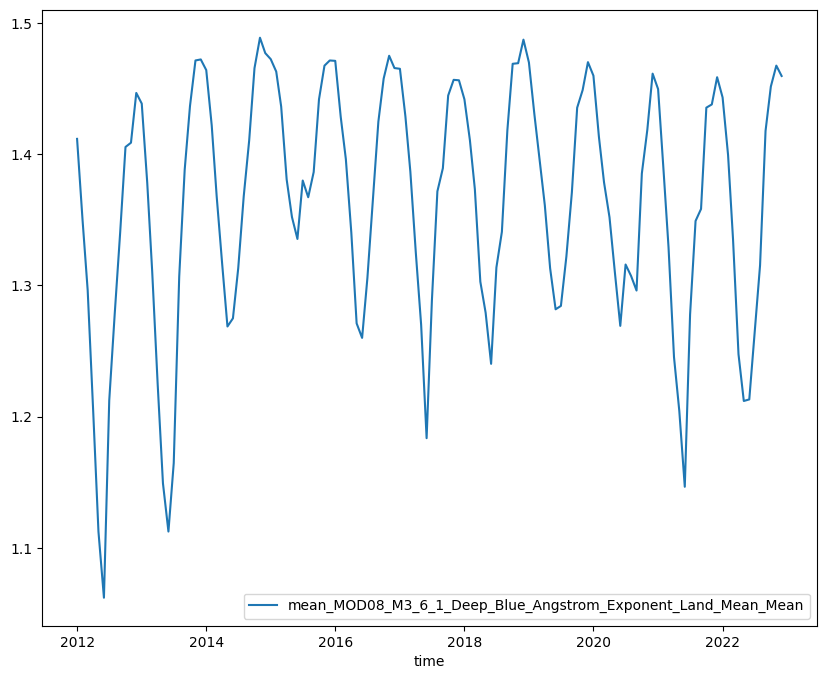

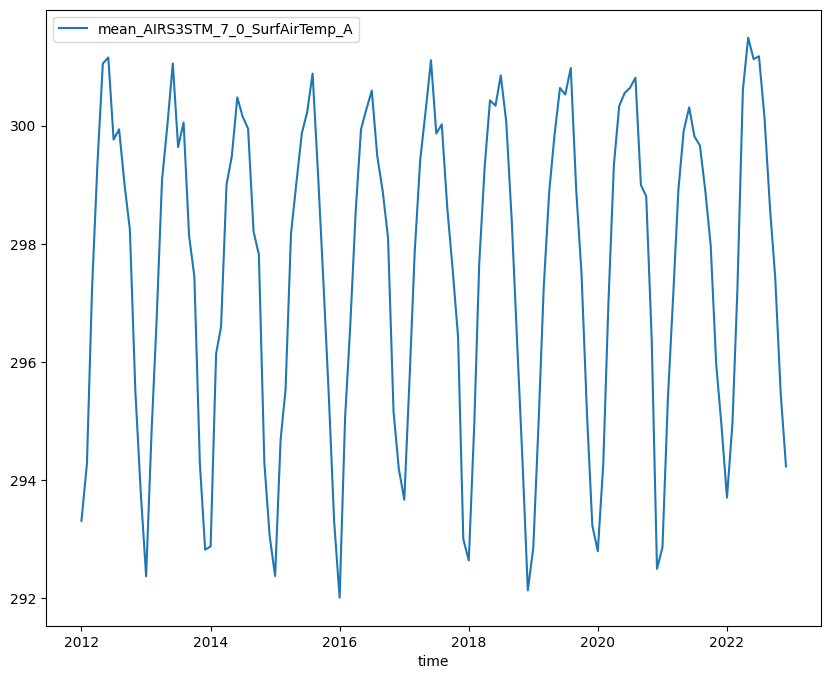

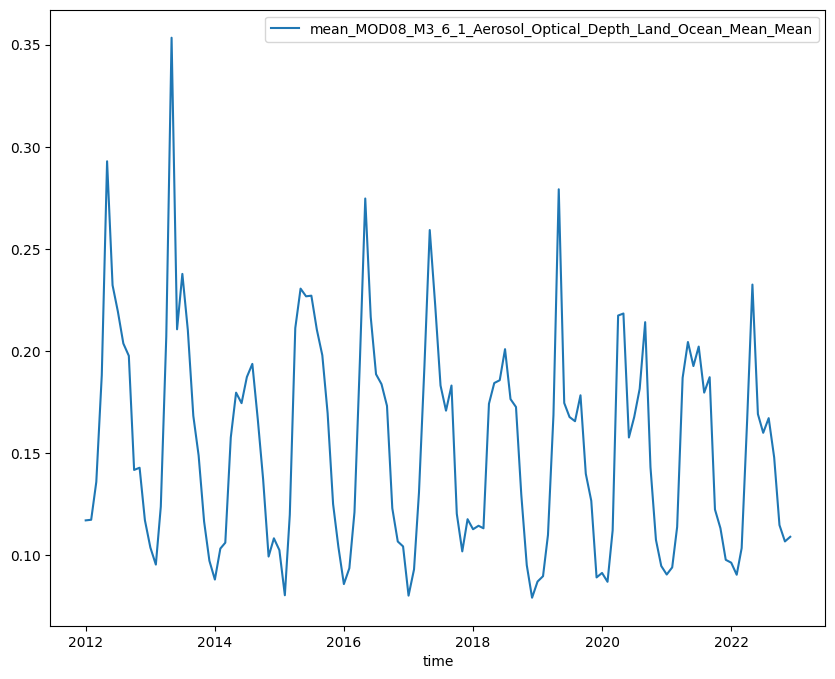

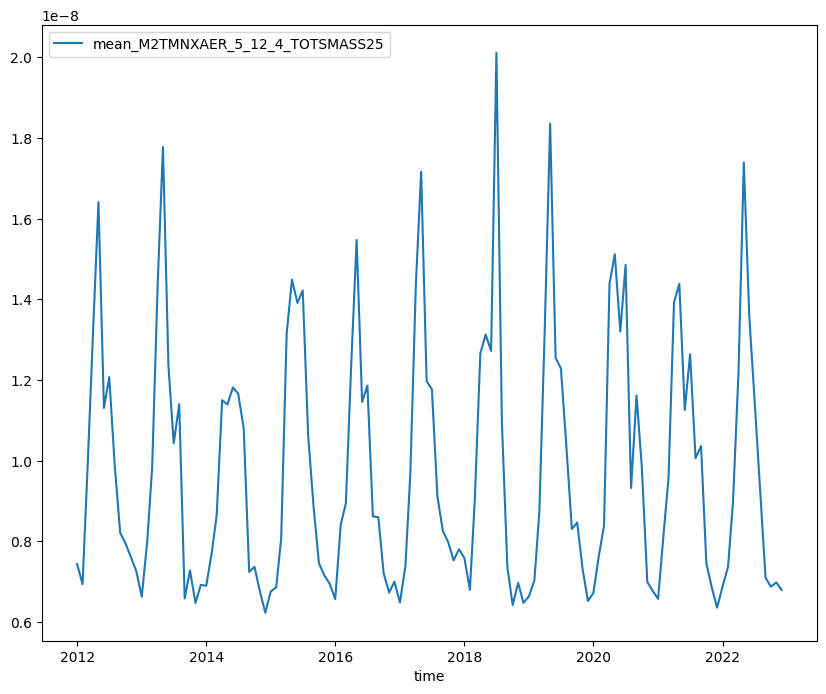

In [ ]:
# Plot Angstrom Exponent
plt.figure(figsize=(10,8))
sns.lineplot(data=angstrom_t)

# Plot Air temperature at surface
plt.figure(figsize=(10,8))
sns.lineplot(data=temp_t)

# Plot AOD
plt.figure(figsize=(10,8))
sns.lineplot(data=aod_t)

# Plot Mass Concentration
plt.figure(figsize=(10,8))
sns.lineplot(data=mass_t)

In [ ]:
# Plot all

all_t = pd.merge(left=angstrom_t, right=temp_t, on='time')

plt.figure(figsize=(10,8))
sns.lineplot(data=all_t)

In [ ]:
# Rename columns
angstrom_t.rename(
    columns={'mean_MOD08_M3_6_1_Deep_Blue_Angstrom_Exponent_Land_Mean_Mean' : 'Angstrom_Exponent'},
    inplace=True
    )

temp_t.rename(
    columns={'mean_AIRS3STM_7_0_SurfAirTemp_A' : 'SurfAirTemp'},
    inplace=True
    )

aod_t.rename(
    columns={'mean_MOD08_M3_6_1_Aerosol_Optical_Depth_Land_Ocean_Mean_Mean' : 'Aerosol_Optical_Depth'},
    inplace=True
    )

mass_t.rename(
    columns={'mean_M2TMNXAER_5_12_4_TOTSMASS25' : 'PM2_5_Mass_Concentration'},
    inplace=True
    )

In [ ]:
# Moving average
def moving_average(y, w):
    # y: AOD
    return np.convolve(y, np.ones(w), 'valid') / w

rolling_angstrom_t = moving_average(angstrom_t['Angstrom_Exponent'], 5)
rolling_temp_t = moving_average(temp_t['SurfAirTemp'], 5)
rolling_aod_t = moving_average(aod_t['Aerosol_Optical_Depth'], 5)
rolling_mass_t = moving_average(mass_t['PM2_5_Mass_Concentration'], 5)

In [ ]:
rolling_angstrom_t.shape, rolling_temp_t.shape, rolling_aod_t.shape, rolling_mass_t.shape

((128,), (128,), (128,), (128,))

In [ ]:
angstrom_t['mean_MOD08_M3_6_1_Deep_Blue_Angstrom_Exponent_Land_Mean_Mean'].shape

(132,)

In [ ]:
# Fill first days of Rolling Mean

# Angstrom Exp
offset = angstrom_t['Angstrom_Exponent'].shape[0] - rolling_angstrom_t.shape[0]
offset_arr = np.zeros(offset)
rolling_angstrom_t = np.concatenate((offset_arr, rolling_angstrom_t))
rolling_angstrom_t[:4] = np.nan

# Air Temp at Surface
offset = temp_t['SurfAirTemp'].shape[0] - rolling_temp_t.shape[0]
offset_arr = np.zeros(offset)
rolling_temp_t = np.concatenate((offset_arr, rolling_temp_t))
rolling_temp_t[:4] = np.nan

# Air Temp at Surface
offset = aod_t['Aerosol_Optical_Depth'].shape[0] - rolling_aod_t.shape[0]
offset_arr = np.zeros(offset)
rolling_aod_t = np.concatenate((offset_arr, rolling_aod_t))
rolling_aod_t[:4] = np.nan

# Mass Concentration PM2.5
offset = mass_t['PM2_5_Mass_Concentration'].shape[0] - rolling_mass_t.shape[0]
offset_arr = np.zeros(offset)
rolling_mass_t = np.concatenate((offset_arr, rolling_mass_t))
rolling_mass_t[:4] = np.nan

rolling_angstrom_t, rolling_temp_t, rolling_aod_t, rolling_mass_t

In [ ]:
# Add Rolling Mean to datasets
angstrom_t['Mov_Avg_Angstrom_Exponent'] = rolling_angstrom_t
temp_t['Mov_Avg_SurfAirTemp'] = rolling_temp_t
aod_t['Mov_Avg_Aerosol_Optical_Depth'] = rolling_aod_t
mass_t['Mov_Avg_PM2_5_Mass_Concentration'] = rolling_mass_t

In [ ]:
# Plot Angstrom vs Rolling Mean
plt.figure(figsize=(16, 6))
sns.lineplot(angstrom_t, color='r', estimator='None')
plt.title('Angstrom Exponent vs Moving Average 5-months')
plt.xlabel('Time')
plt.ylabel('Angstrom Exponent Mean')

# Plot Air Temp vs Rolling Mean
plt.figure(figsize=(16, 6))
sns.lineplot(temp_t, color='r', estimator='None')
plt.title('Air Temp at Surface vs Moving Average 5-months')
plt.xlabel('Time')
plt.ylabel('Temperature Mean [K]')

# Plot AOD vs Rolling Mean
plt.figure(figsize=(16, 6))
sns.lineplot(temp_t, color='r', estimator='None')
plt.title('AOD vs Moving Average 5-months')
plt.xlabel('Time')
plt.ylabel('AOD')

# Plot Mass Conc vs Rolling Mean
plt.figure(figsize=(16, 6))
sns.lineplot(temp_t, color='r', estimator='None')
plt.title('Mass Concentration PM2.5 vs Moving Average 5-months')
plt.xlabel('Time')
plt.ylabel(r'Mass Concentration PM2.5 [$\frac{m}{kg^3}$]')

Text(0.5, 1.0, 'Correlation Map')

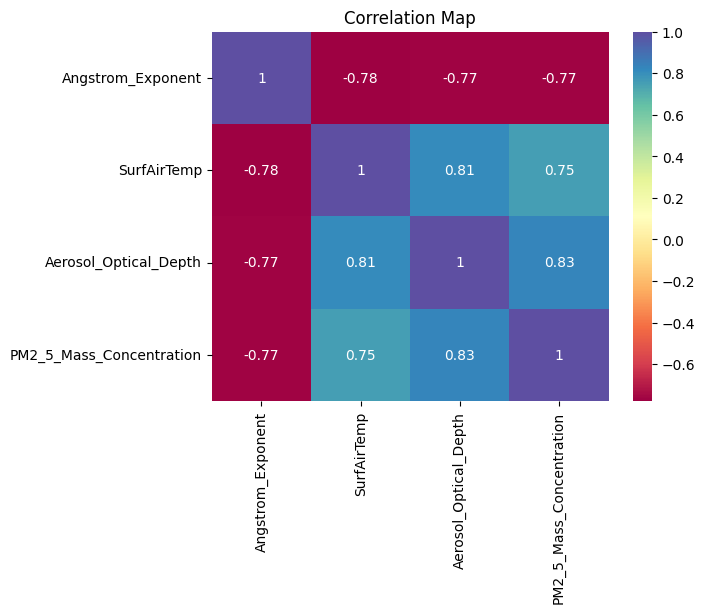

In [ ]:
# Correlation Map
df = angstrom_t.copy()
df = df.merge(temp_t.copy(), on='time')
df = df.merge(aod_t.copy(), on='time')
df = df.merge(mass_t.copy(), on='time')
df.drop(labels=['Mov_Avg_Angstrom_Exponent', 'Mov_Avg_SurfAirTemp', 'Mov_Avg_Aerosol_Optical_Depth', 'Mov_Avg_PM2_5_Mass_Concentration'], axis=1, inplace=True)
sns.heatmap(df.corr(), cmap='Spectral', annot=True)
plt.title('Correlation Map')

In [ ]:
df['month'] = df.index.strftime('%b')
df

,Angstrom_Exponent,SurfAirTemp,Aerosol_Optical_Depth,PM2_5_Mass_Concentration,month
time,,,,,
2012-01-01,1.411760,293.310822,0.117177,7.437596e-09,Jan
2012-02-01,1.349949,294.278107,0.117477,6.936531e-09,Feb
2012-03-01,1.296395,297.243011,0.136016,9.890583e-09,Mar
2012-04-01,1.204758,299.385132,0.188264,1.324584e-08,Apr
2012-05-01,1.112397,301.049805,0.292926,1.640908e-08,May
...,...,...,...,...,...
2022-08-01,1.315406,300.148834,0.167210,9.300471e-09,Aug
2022-09-01,1.417800,298.627350,0.148019,7.099208e-09,Sep
2022-10-01,1.451632,297.427155,0.114876,6.873226e-09,Oct


<Axes: xlabel='month', ylabel='PM2_5_Mass_Concentration'>

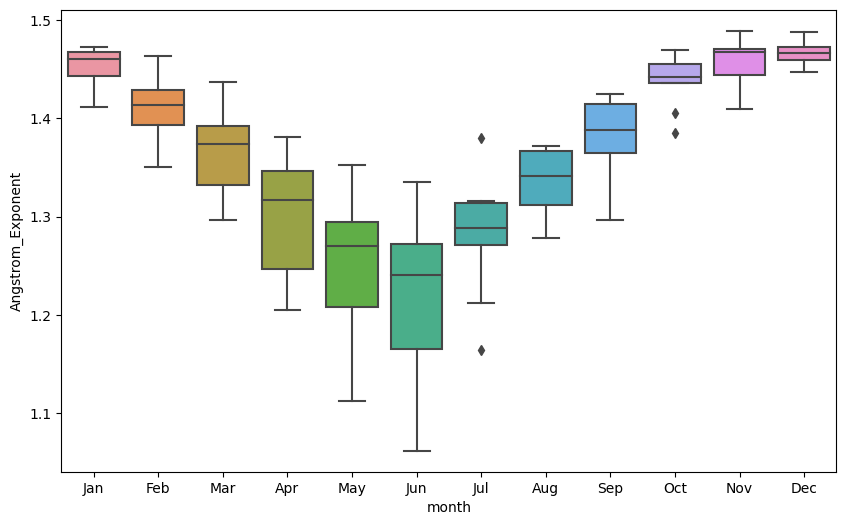

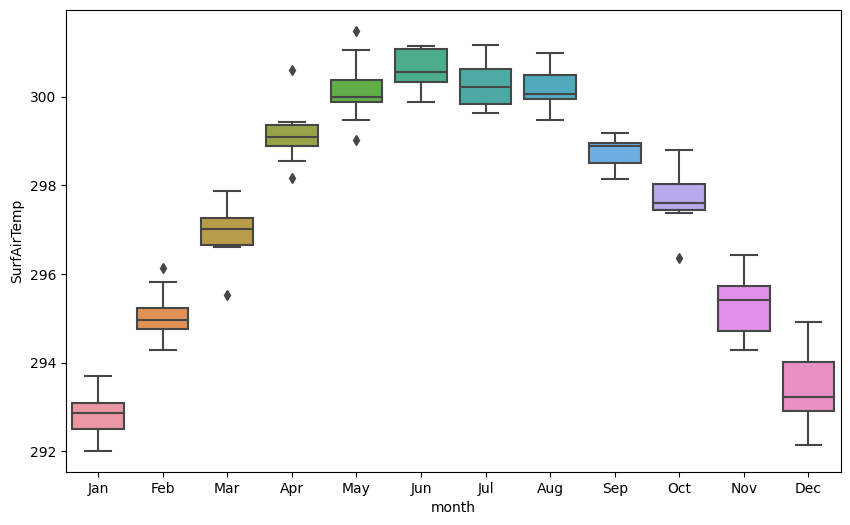

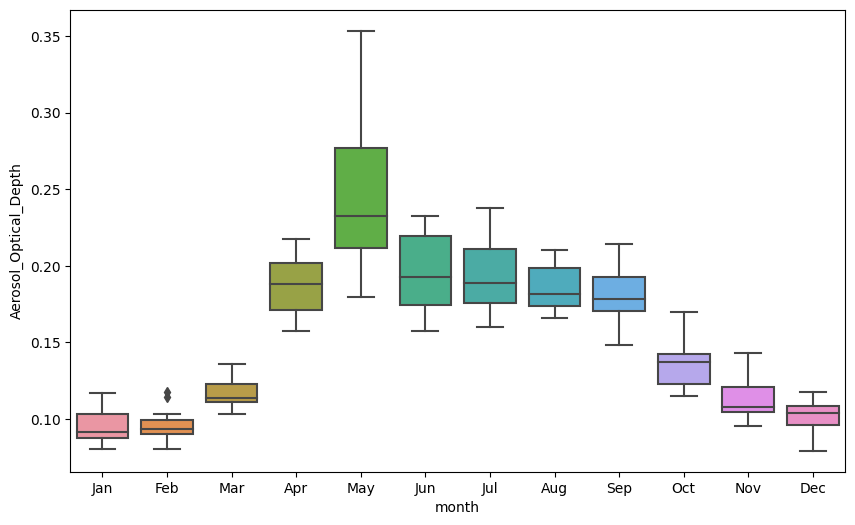

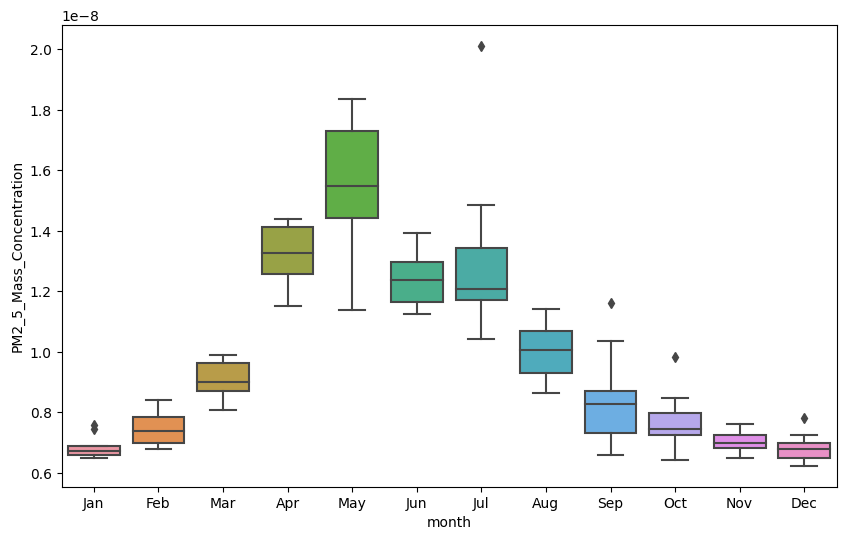

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='Angstrom_Exponent', data=df)

plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='SurfAirTemp', data=df)

plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='Aerosol_Optical_Depth', data=df)

plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='PM2_5_Mass_Concentration', data=df)